In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
club_rankings = pd.read_csv('spi_global_rankings.csv')
matches = pd.read_csv('spi_matches.csv')

In [3]:
matches_with_xg = matches.dropna(0, subset=['xg1'])

In [17]:
name_and_rank = club_rankings[['rank', 'name']].copy()
name_and_rank

,rank,name
0,1,Manchester City
1,2,Bayern Munich
2,3,Liverpool
3,4,Barcelona
4,5,Paris Saint-Germain
...,...,...
624,625,Grimsby Town
625,626,Macclesfield
626,627,Walsall
627,628,Colorado Springs Switchbacks FC


In [5]:
home_teams = matches[['date', 'team1', 'spi1', 'proj_score1', 'score1']].copy()
away_teams = matches[['date', 'team2', 'spi2', 'proj_score2', 'score2']].copy()

In [6]:
score_vs_proj = home_teams['score1'] - home_teams['proj_score1']

In [7]:
home_teams['score_vs_proj'] = score_vs_proj

In [8]:
home_teams.rename(columns={'team1': 'team', 'score1': 'score', 'proj_score1': 'projected', 'spi1': 'spi'}, inplace=True)

In [9]:
score_vs_proj2 = away_teams['score2'] - away_teams['proj_score2']
type(score_vs_proj2)
away_teams['score_vs_proj'] = score_vs_proj2

In [10]:
away_teams.rename(columns = {'team2': 'team', 'score2': 'score', 'proj_score2': 'projected', 'spi2': 'spi'}, inplace=True)

In [11]:
home_teams.dropna(inplace=True)
away_teams.dropna(inplace=True)

In [12]:
all_teams = home_teams.append(away_teams)

In [39]:
all_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55420 entries, 0 to 27723
Data columns (total 6 columns):
date             55420 non-null object
team             55420 non-null object
spi              55420 non-null float64
projected        55420 non-null float64
score            55420 non-null float64
score_vs_proj    55420 non-null float64
dtypes: float64(4), object(2)
memory usage: 3.0+ MB


In [13]:
team_averages = all_teams.groupby(by='team').mean()
games_played = all_teams.groupby(by='team').size()
team_averages['games'] = games_played

In [14]:
team_averages.head()

,spi,projected,score,score_vs_proj,games
team,,,,,
1. FC Heidenheim 1846,33.368916,1.317831,1.542169,0.224337,83
1. FC Kaiserslautern,34.278824,1.155588,1.235294,0.079706,34
1. FC Magdeburg,30.305882,1.236176,1.029412,-0.206765,34
1. FC Nürnberg,47.050000,1.322530,1.301205,-0.021325,83
1. FC Union Berlin,44.512469,1.451111,1.530864,0.079753,81


In [18]:
name_and_rank.rename(columns={'name': 'team'}, inplace=True)

In [28]:
team_averages_w_rank = team_averages.merge(name_and_rank, how='inner', on='team')

In [21]:
team_averages_w_rank.head()

,team,spi,projected,score,score_vs_proj,games,rank
0,1. FC Heidenheim 1846,33.368916,1.317831,1.542169,0.224337,83,384
1,1. FC Nürnberg,47.050000,1.322530,1.301205,-0.021325,83,363
2,1. FC Union Berlin,44.512469,1.451111,1.530864,0.079753,81,96
3,AC Ajaccio,29.977609,1.222609,1.206522,-0.016087,92,437
4,AC Horsens,28.614000,1.130200,0.960000,-0.170200,50,520


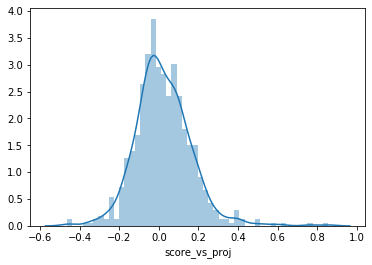

In [22]:
sns.distplot(team_averages_w_rank['score_vs_proj'], bins=50)

In [23]:
team_averages_w_rank.describe()

,spi,projected,score,score_vs_proj,games,rank
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.00000
mean,41.908167,1.320050,1.342696,0.022646,80.352941,315.00000
std,17.170683,0.277898,0.332991,0.143111,36.249613,181.72094
min,6.770769,0.635455,0.578947,-0.464211,5.000000,1.00000
25%,30.027941,1.134762,1.109375,-0.066702,50.000000,158.00000
50%,40.640843,1.264118,1.292308,0.010000,81.000000,315.00000
75%,52.592632,1.451111,1.516484,0.100667,106.000000,472.00000
max,93.419636,2.711900,2.940000,0.855833,170.000000,629.00000


In [29]:
team_averages_w_rank = team_averages_w_rank.loc[(team_averages_w_rank['games'] > 20)]

Text(0.5, 1.0, 'Distribution of Team Performace vs Expectation')

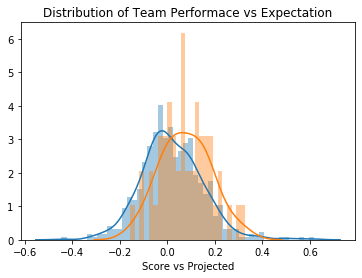

In [58]:
sns.distplot(team_averages_w_rank['score_vs_proj'], bins=50)
sns.distplot(top_50['score_vs_proj'], bins=25)
plt.xlabel('Score vs Projected')
plt.title('Distribution of Team Performace vs Expectation')

In [31]:
top_50 = team_averages_w_rank.loc[(team_averages_w_rank['rank'] <= 50)]

In [33]:
top_50.describe()

,spi,projected,score,score_vs_proj,games,rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,75.080947,1.709553,1.786251,0.076699,133.260000,25.50000
std,9.654854,0.401970,0.421592,0.106159,29.485251,14.57738
min,49.421971,1.084922,1.093750,-0.156424,21.000000,1.00000
25%,71.189539,1.355682,1.481654,0.006142,117.750000,13.25000
50%,74.660172,1.644875,1.740140,0.070751,138.000000,25.50000
75%,80.762995,1.930743,1.968866,0.146390,155.250000,37.75000
max,93.419636,2.711900,2.940000,0.328406,170.000000,50.00000


In [38]:
stats.ttest_1samp(top_50['score_vs_proj'], team_averages_w_rank['score_vs_proj'].mean())

Ttest_1sampResult(statistic=3.782322728565078, pvalue=0.00042314492970612196)